# City blocks layer generating

In [1]:
import os
import geopandas as gpd

# os.environ["USE_PYGEOS"] = os.environ.get("USE_PYGEOS", "0")
local_crs = 32637
# path to data
example_data_path = "./data/spb"

## Input data fetch and parameters setting

In [2]:
from blocksnet import BlocksGenerator

territory = gpd.read_file(os.path.join(example_data_path, "territory_spb.geojson")).to_crs(local_crs)
water = gpd.read_file(os.path.join(example_data_path, "water_spb.geojson")).to_crs(local_crs)
roads = gpd.read_file(os.path.join(example_data_path, "roads_spb.geojson")).to_crs(local_crs)
railways = gpd.read_file(os.path.join(example_data_path, "railways_spb.geojson")).to_crs(local_crs)

bg = BlocksGenerator(boundaries=territory, water=water, roads=roads, railways=railways)

/home/vasilstar/masterplanning/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


2024-07-17 16:44:19.095 | INFO     | blocksnet.preprocessing.blocks_generator:__init__:69 - Check boundaries schema
2024-07-17 16:44:19.112 | INFO     | blocksnet.preprocessing.blocks_generator:__init__:73 - Check roads schema
2024-07-17 16:44:19.129 | INFO     | blocksnet.preprocessing.blocks_generator:__init__:79 - Check railways schema
2024-07-17 16:44:19.138 | INFO     | blocksnet.preprocessing.blocks_generator:__init__:85 - Check water schema
2024-07-17 16:44:19.147 | INFO     | blocksnet.preprocessing.blocks_generator:__init__:94 - Exclude water objects


In [3]:
blocks = bg.run()

2024-07-17 16:44:33.711 | INFO     | blocksnet.preprocessing.blocks_generator:run:130 - Generating blocks
2024-07-17 16:44:33.863 | INFO     | blocksnet.preprocessing.blocks_generator:run:139 - Setting up enclosures
2024-07-17 16:44:35.808 | INFO     | blocksnet.preprocessing.blocks_generator:run:143 - Filling holes
2024-07-17 16:44:36.386 | INFO     | blocksnet.preprocessing.blocks_generator:run:147 - Dropping overlapping blocks
2024-07-17 16:44:37.538 | INFO     | blocksnet.preprocessing.blocks_generator:run:161 - Calculating blocks area
2024-07-17 16:44:37.720 | INFO     | blocksnet.preprocessing.blocks_generator:run:168 - Blocks generated


In [4]:
blocks.head()

,geometry
0,"POLYGON ((21234.410 6676652.978, 21237.604 667..."
1,"POLYGON ((21245.938 6676649.579, 21241.440 667..."
2,"POLYGON ((21245.938 6676649.579, 21256.898 667..."
3,"POLYGON ((21589.301 6676539.456, 21579.273 667..."
4,"POLYGON ((21589.301 6676539.456, 21596.221 667..."


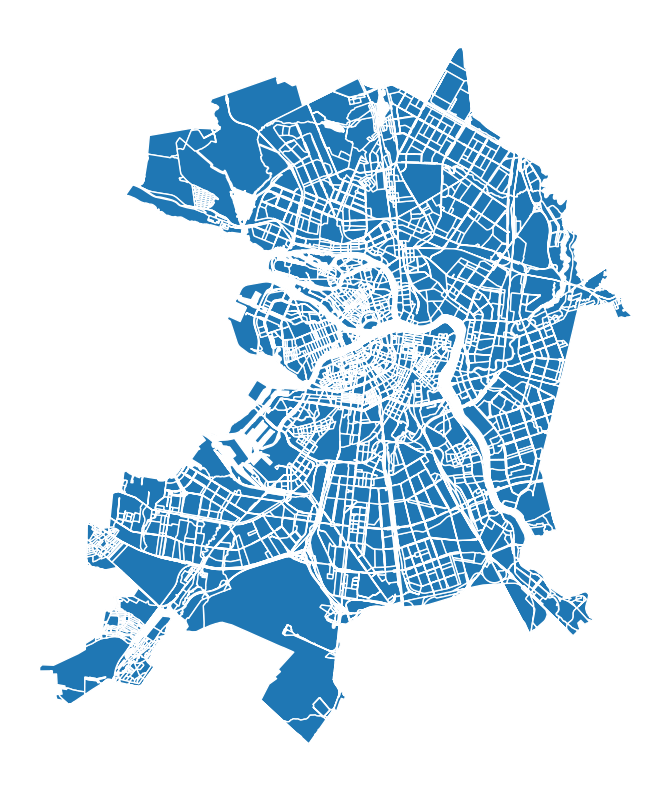

In [5]:
blocks.plot(figsize=(10,10)).set_axis_off()

In [6]:
from blocksnet.preprocessing import LandUseProcessor

zones = gpd.read_file(os.path.join(example_data_path, "pzz.geojson")).to_crs(local_crs)
lup = LandUseProcessor(blocks=blocks, zones=zones)

In [7]:
blocks = lup.run()

2024-07-17 16:44:43.535 | INFO     | blocksnet.preprocessing.land_use_proccessor:run:95 - Overlaying geometries
2024-07-17 16:44:50.539 | INFO     | blocksnet.preprocessing.land_use_proccessor:run:108 - Finding sum of intersection areas
2024-07-17 16:44:50.561 | INFO     | blocksnet.preprocessing.land_use_proccessor:run:120 - Getting intersecting attributes


Save the result for the next example

In [8]:
blocks.head()

,geometry,zone,land_use
0,"POLYGON ((21234.410 6676652.978, 21237.604 667...",ТУ,TRANSPORT
1,"POLYGON ((21245.938 6676649.579, 21241.440 667...",ТУ,TRANSPORT
2,"POLYGON ((21245.938 6676649.579, 21256.898 667...",Т3Ж1,RESIDENTIAL
3,"POLYGON ((21589.301 6676539.456, 21579.273 667...",ТР0-2,RECREATION
4,"POLYGON ((21589.301 6676539.456, 21596.221 667...",ТУ,TRANSPORT


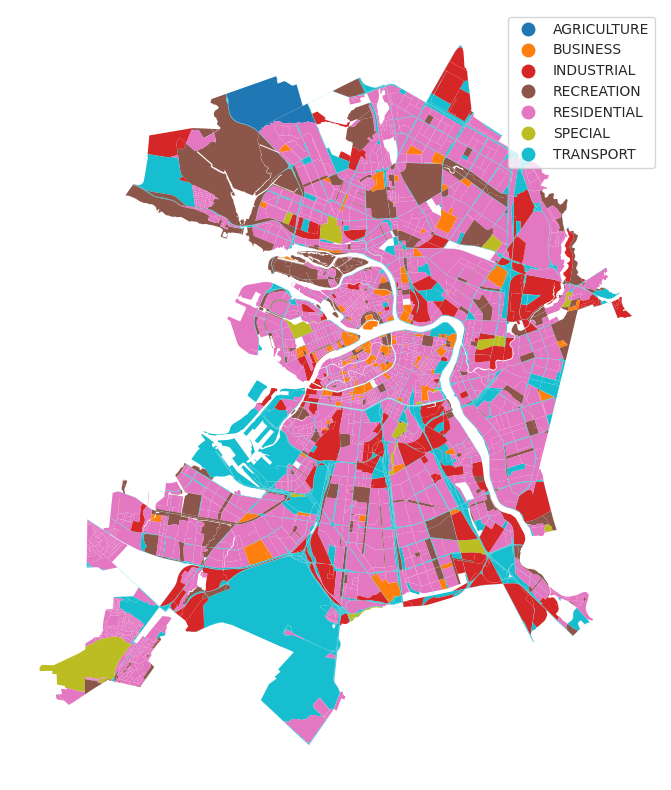

In [12]:
blocks.plot(column='land_use', legend=True, figsize=(10,10), linewidth=0).set_axis_off()

In [10]:
blocks.to_parquet(os.path.join(example_data_path, "blocks.parquet"))